In [135]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import glob
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
print(tf.__version__)

2.10.1


In [136]:
import splitfolders
splitfolders.ratio('data', output="output", seed=1337, ratio=(.8, 0.2)) 

Copying files: 1497 files [00:15, 98.25 files/s] 


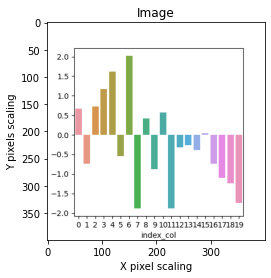

In [137]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread("./output/train/bar/bar10.png")
plt.imshow(image)
plt.show()

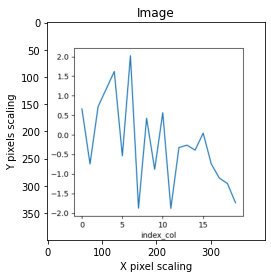

In [138]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread("./output/train/line/line10.png")
plt.imshow(image)
plt.show()

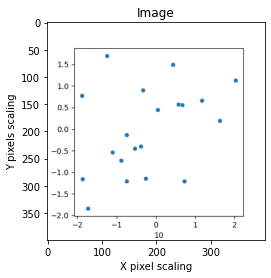

In [139]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread("./output/train/scatter/scatter10.png")
plt.imshow(image)
plt.show()

In [140]:
image.shape

(400, 400, 4)

In [141]:
img_width, img_height = 400,400

train_data_dir = 'output/train'
validation_data_dir = 'output/val'
nb_train_samples = 64
nb_validation_samples = 32
epochs = 500
batch_size = 3

In [142]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [143]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 398, 398, 16)      448       
                                                                 
 activation_10 (Activation)  (None, 398, 398, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 199, 199, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 197, 197, 32)      4640      
                                                                 
 activation_11 (Activation)  (None, 197, 197, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                  

In [144]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [145]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [146]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen = ImageDataGenerator(rescale = 1. /255)

In [147]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1197 images belonging to 3 classes.


In [148]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 525 images belonging to 3 classes.


In [149]:
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
import pandas as pd

In [150]:
def historyfile():
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        callbacks=[time_callback])
    
    hist_df = pd.DataFrame(history.history) 
    # or save to csv: 
    hist_df['elaped time'] = time_callback.times
    hist_df['epochs'] = hist_df.index+1
    hist_df
    return hist_df

In [ ]:
def training_withepoch(epocs):
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epocs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        callbacks=[time_callback])


In [ ]:
def load_image(filename):
    	# load the image
	img = load_img(filename, target_size=(400,400))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape( 1,400, 400, 3)
	# center pixel data
	img = img.astype('float32')
	img = img /255.0
	return img

1/1 [==============================] - 0s 83ms/step
[5.9105125e-05 9.9993587e-01 5.0550157e-06]
1/1 [==============================] - 0s 76ms/step
[3.9303454e-06 9.9999607e-01 4.1090054e-08]
1/1 [==============================] - 0s 75ms/step
[1.7323943e-07 9.9999988e-01 2.1701547e-09]
1/1 [==============================] - 0s 75ms/step
[1.6910813e-05 9.9998295e-01 1.5763963e-07]
1/1 [==============================] - 0s 80ms/step
[2.1933363e-06 9.9999785e-01 7.5655882e-09]


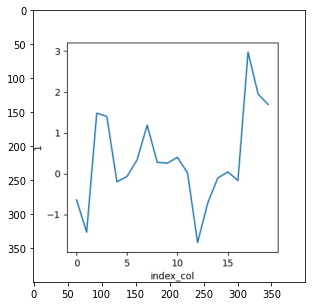

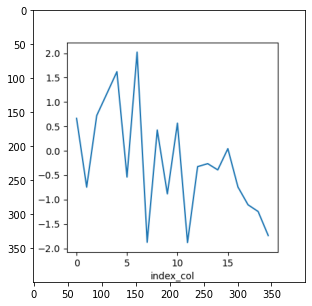

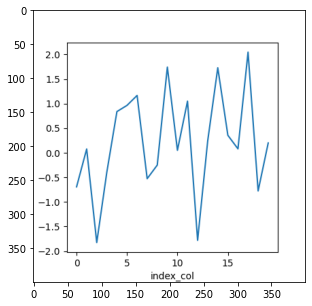

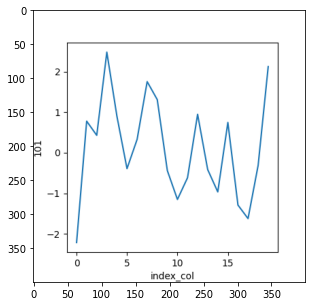

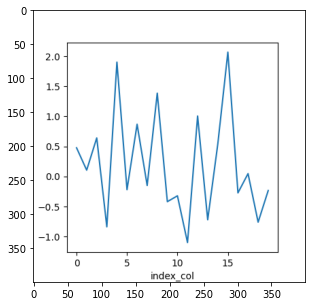

In [163]:
def print_per_cluster(folder_name):
    count = 0

    for img_path in glob.glob(folder_name):
        plt.figure(figsize=(10,5))
        images = mpimg.imread(img_path)
    
        img = load_image(img_path)
        result = model.predict(img)
        print(result[0])
        plt.imshow(images)
        count +=1
        if count == 5:
            break

print_per_cluster('./output/train/line/*.png')